In [ ]:
!nvidia-smi # To see the GPU present in Collab itself.

Thu Feb  4 18:09:10 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive # To mount drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.layers import Conv2D,Dense,Flatten # Some convolutional Neural Networks things
from tensorflow.keras.applications.vgg16 import VGG16 # Pretrained model
from tensorflow.keras import Model # Importing model
from tensorflow.keras import callbacks # To save the best model
from tensorflow.keras.preprocessing.image import ImageDataGenerator # For Data Augmentation

In [ ]:
vgg16=VGG16(include_top=False,weights='imagenet',input_shape=[224,224,3]) # Dowloading the resnet and removinf first and last layers

58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
for layer in vgg16.layers:
  layer.trainable=False # we don't want to train existing weights

In [ ]:
x=Flatten()(vgg16.output) # Flatten the output layer

In [ ]:
output=Dense(2,'sigmoid')(x) # Ading a dense layer
model=Model(inputs=vgg16.input,outputs=output) # Creating the model

In [ ]:
train_path="/content/drive/MyDrive/Health App/skin cancer dl/data/train" # Specifying the path for both train, and validations
val_path="/content/drive/MyDrive/Health App/skin cancer dl/data/test"

In [ ]:
train_image_gen=ImageDataGenerator(rescale=1/255, # Doing some Data Augmentation for train_images
                                   shear_range=0.3,
                                   zoom_range=0.2,
                                   width_shift_range=0.2)
val_image_gen=ImageDataGenerator(rescale=1/255) # Reclae the validation images

In [ ]:
# Now specifying the path, target size, class mode and batch size
train_set=train_image_gen.flow_from_directory(train_path,target_size=(224,224),class_mode='categorical',batch_size=32)
val_set=val_image_gen.flow_from_directory(val_path,target_size=(224,224),class_mode='categorical',batch_size=32)

Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


In [ ]:
# saving the model whose val_loss is very low
check_points=callbacks.ModelCheckpoint("/content/drive/MyDrive/Health App/Model/skin cancer vgg16 model.h5",verbose=2,monitor='val_accuracy',save_best_only=True)

In [ ]:
# Compiling the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# Fiting the model
history=model.fit(train_set,steps_per_epoch=len(train_set),
                            epochs=50,verbose=1,
                            validation_steps=len(val_set),callbacks=[check_points],
                            validation_data=val_set)

Epoch 1/50
83/83 [==============================] - 2256s 27s/step - loss: 0.7443 - accuracy: 0.6822 - val_loss: 0.3784 - val_accuracy: 0.8227

Epoch 00001: val_accuracy improved from -inf to 0.82273, saving model to /content/drive/MyDrive/Health App/Model/skin cancer vgg16 model.h5
Epoch 2/50
83/83 [==============================] - 32s 387ms/step - loss: 0.3541 - accuracy: 0.8453 - val_loss: 0.3396 - val_accuracy: 0.8394

Epoch 00002: val_accuracy improved from 0.82273 to 0.83939, saving model to /content/drive/MyDrive/Health App/Model/skin cancer vgg16 model.h5
Epoch 3/50
83/83 [==============================] - 32s 388ms/step - loss: 0.3451 - accuracy: 0.8491 - val_loss: 0.3879 - val_accuracy: 0.8409

Epoch 00003: val_accuracy improved from 0.83939 to 0.84091, saving model to /content/drive/MyDrive/Health App/Model/skin cancer vgg16 model.h5
Epoch 4/50
83/83 [==============================] - 32s 388ms/step - loss: 0.2929 - accuracy: 0.8722 - val_loss: 0.3586 - val_accuracy: 0.8364

In [ ]:
import matplotlib.pyplot as plt # For visualization

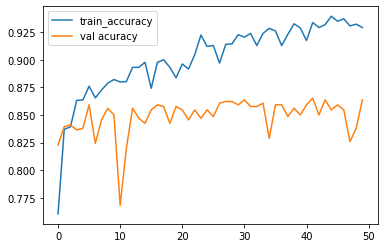

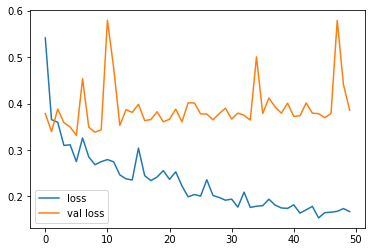

In [ ]:
# Plotting the graph to see, accuracy, val_accuracy, loss and val_loss.
plt.plot(history.history['accuracy'],label='train_accuracy') 
plt.plot(history.history['val_accuracy'],label='val acuracy')
plt.legend()
plt.show()
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val loss')
plt.legend()
plt.show()